## This is my individual assignment about Regression Models in Machine Learning Class. 

### The content is credited partially to Professor Long He, Department of Decision Sciences, The George Washington University 

### Introduction

In this assignment, we are going to experiment the linear regression and KNN algorithms respectively on a higher-dimensional dataset and experience the change of prediction performance as the dimensionality/flexibility grows.

The experiment is built on top of the 3rd-order polynomial model:
$$y = \beta_0 + \beta_1 * x + \beta_2 * x^2 + \beta_3 * x^3 + \epsilon, ~~ \epsilon \sim \text{N}(0, \sigma^2).$$


### Generation of the high-dimensional dataset
We first simulate the 3rd-order polynomial datasets

In [1]:
import numpy as np
## population parameters
beta0 = 1
beta1 = -2
beta2 = 6
beta3 = -1
sigma = 2

np.random.seed(7890)

## training data
x = np.arange(0 , 5 , 0.05)
f_x = beta0 + beta1 * x + beta2 * x**2 + beta3 * x**3
epsilon = np.random.normal(loc=0, scale=sigma, size=100)
y = f_x + epsilon
x = np.expand_dims(x, axis = 1)

## test data
x_test = np.arange(0 , 6, 0.1)
f_x_test = beta0 + beta1 * x_test + beta2 * x_test**2 + beta3 * x_test**3
epsilon_test = np.random.normal(loc=0, scale=sigma, size=len(x_test))
y_test = f_x_test + epsilon_test
x_test = np.expand_dims(x_test, axis = 1)

The resulted training and test dataset have **100** and **60** data points, respectively.


## Part A: Linear Regression

#### (A.0)	Visualize the all the training data $(x,y)$ in a scatter plot.

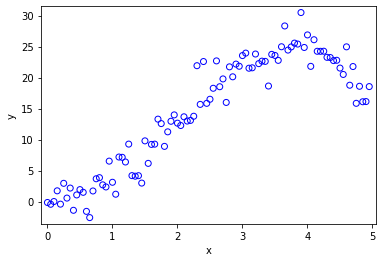

In [2]:
import matplotlib.pyplot as plt
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(xmin=np.min(x)-0.1,xmax=np.max(x)+0.1)
plt.ylim(ymin=np.min(y)-1,ymax=np.max(y)+1)
plt.scatter(x,y, marker='o', facecolors='none', edgecolors='blue')

#### (A.1)	Fit a linear regression model to predict $y$ with $(x)$ only, i.e., $\hat y=\beta_0+\beta_1x$, and measure the training and test MSE.  

In [3]:
#I use the LinearRegression from scikit-learn library
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x, y)

y_pred_train = linear_reg.predict(x)
y_pred_test = linear_reg.predict(x_test)

In [4]:
#Measure the training and test MSE
from sklearn.metrics import mean_squared_error as mse
train_mse = mse(y, y_pred_train)
print("The training MSE is",train_mse)

The training MSE is 17.983160898225773


In [5]:
test_mse = mse(y_test, y_pred_test)
print("The test MSE is",test_mse)

The test MSE is 132.1784624869898


#### (A.2)	We call a regression model of order $k$ if it includes features $(x, x^2, \cdots, x^k)$, i.e., $\hat y=\beta_0+\beta_1x+\beta_2x^2+\cdots+\beta_k x^k$. For $k=2,3,\cdots, 8$, fit a regression model of order $k$ to predict $y$, and measure the training and test MSE under each value of $k$. 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import numpy as np

train_mse = np.zeros(8)
test_mse = np.zeros(8)

for k in range(1, 9):
    X_train = np.hstack([x**i for i in range(1, k+1)])
    X_test = np.hstack([x_test**i for i in range(1, k+1)])
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y)
    y_pred_train = lin_reg.predict(X_train)
    y_pred_test = lin_reg.predict(X_test)
    train_mse[k-1] = mse(y, y_pred_train)
    test_mse[k-1] = mse(y_test, y_pred_test)
print("The training MSE is",train_mse)
print("The test MSE is",test_mse)

The training MSE is [17.9831609  10.01558847  4.35427998  4.35369617  4.3430076   4.33515634
  4.28323443  4.21772084]
The test MSE is [ 132.17846249   51.28196426    4.58625656    4.78525926    8.38334685
   24.01797251   89.19710155 1855.47094602]


#### (A.3)	Plot the training and test MSE curves agains $k$ for $k=1,2,\cdots,8$. Comment on the curves.

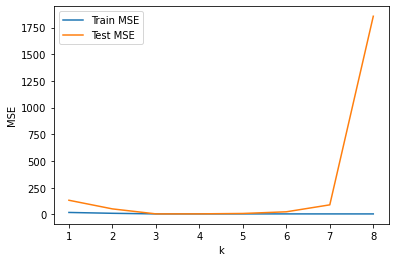

In [7]:
import matplotlib.pyplot as plt
k_values = range(1, 9)
plt.plot(k_values, train_mse, label='Train MSE')
plt.plot(k_values, test_mse, label='Test MSE')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.show()

**Comment on the curves:**

We could see that when the order of the regression model increases from 2 to 8, the training MSE does not change much while the test MSE decreases, then increases. It is interpreted that the model is over-fitting when the k value is large. With so many terms, the model can capture all the noise and fluctuations in the training data, which might not result in good predictions when applied to test data.

The minimum test MSE occurs at around k = 4, which might tell us to consider a fourth-degree polynomial regression model is the best option for this dataset. On the other hand, at k =8, it indicates that the model is overfitting.

From this plot, we can take some elements into account, such as interpretability, parsimony and level of fitting for the training and test data.

## Part B: K-Nearest Neighbor Algorithm

Now, we are going to introduce an extra 20-dimensional predictor $z$, which does NOT actually play a role in generating $y$. Yet, when in estimation, we do not know the fact and will use both $x$ and $z$ as predictors in the KNN algorithm.


We need to generate $z$, the 20-dimensional predictors, of the same sizes. Each $z$ is a 20-dimensional multivariate normal random variable, with mean being $(0, 0, \ldots, 0)$ and identity covariance matrix (so that the 20 elements are independent standard normal random variables). The resulted $z$ is a 100*20 matrix, with each row being a data point with 20 dimensions.

In [8]:
np.random.seed(7891)
z = np.random.multivariate_normal(size = 100, mean = [0]*20, cov = np.identity(20))
z_test = np.random.multivariate_normal(size = 60, mean = [0]*20, cov = np.identity(20))

Later, we will use $(x, z)$ to predict $y$. Let's first combine $x$ and $z$ into matrices

In [9]:
train_xz = np.concatenate((x,z),axis = 1)
test_xz =  np.concatenate((x_test,z_test),axis = 1)

#### (B.1)	For a fixed $k=15$, fit a KNN model to predict $y$ with $(x, z)$, and measure the training and test MSE. 

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
model = KNeighborsRegressor(n_neighbors = 15)
model.fit(train_xz,y)
y_train_pred_xz = model.predict(train_xz)
y_test_pred_xz = model.predict(test_xz)

In [11]:
#Measure the training and test MSE
train_mse = mse(y, y_train_pred_xz)
print("Training MSE is", train_mse)
test_mse = mse(y_test, y_test_pred_xz)
print("Test MSE is", test_mse)

Training MSE is 31.391551438412986
Test MSE is 75.53530748911486


#### (B.2)	With the same data, plot the training and test MSE of the KNN model against $k$, and find the optimal $k$ and the corresponding test MSE. 

In [12]:
train_mse = [-1]*30
test_mse = [-1]*30
for k in range(30):
    model = KNeighborsRegressor(n_neighbors=k+1)
    model.fit(train_xz, y) #fit the model
    y_train_pred_xz = model.predict(train_xz)
    train_mse[k] = mse(y, y_train_pred_xz)
    y_test_pred_xz = model.predict(test_xz)
    test_mse[k] = mse(y_test, y_test_pred_xz)

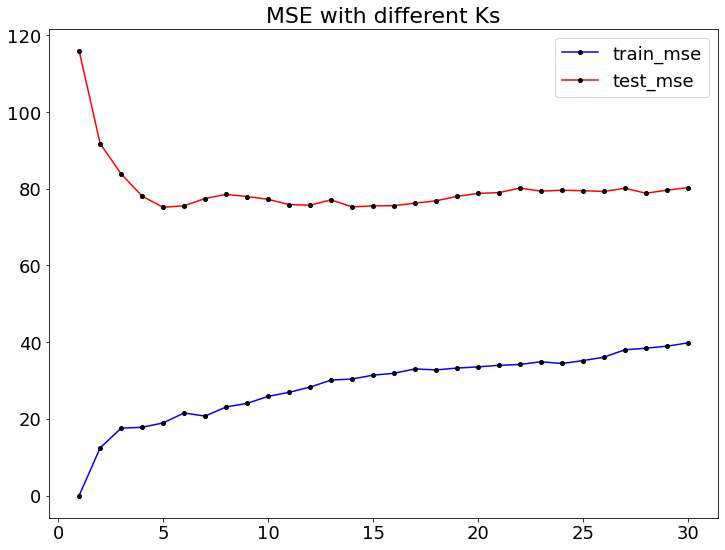

In [13]:
#Plot the KNN model
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, train_mse,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'train_mse')
plt.plot(np.arange(30)+1, test_mse,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'test_mse')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [14]:
#Find the optimal k and the corresponding test MSE
np.argmin(test_mse)+1

5

In [15]:
min(test_mse)

75.16169703405784


#### (B.3)	Based on the analysis above, compare the above model with $(x, z)$ being the predictors and the model with $x$ only. Briefly explain the results. 

For the KNN model with x only, we plot the training and test MSE of the KNN model against  𝑘, and find the optimal  𝑘 and the corresponding test MSE.

In [16]:
train_x = np.arange(0 , 5 , 0.05)
test_x = np.arange(0 , 6, 0.1)
train_x = np.expand_dims(train_x, axis = 1)
test_x = np.expand_dims(test_x, axis = 1)
train_mse = [-1]*30
test_mse = [-1]*30
for k in range(30):
    model = KNeighborsRegressor(n_neighbors=k+1)
    model.fit(train_x, y) #fit the model
    y_train_pred_x = model.predict(train_x)
    train_mse[k] = mse(y, y_train_pred_x)
    y_test_pred_x = model.predict(test_x)
    test_mse[k] = mse(y_test, y_test_pred_x)

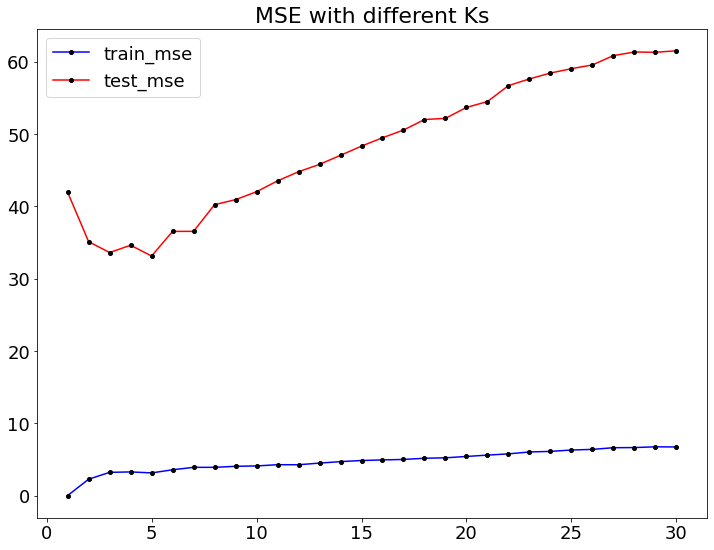

In [17]:
#Plot the KNN model
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, train_mse,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'train_mse')
plt.plot(np.arange(30)+1, test_mse,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'test_mse')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [18]:
#Find the optimal k and the corresponding test MSE
np.argmin(test_mse)+1

5

In [19]:
min(test_mse)

33.116659215036535

In the KNN model with (x,z) being the predictors, the optimal k=5 and the corresponding test MSE could be around 75. Meanwhile, in the model with x only, the optimal k=5 and the corresponding test MSE is 33. Therefore, we could see that when adding z to the model, it is not really better because it might increase the test MSE. 

We can have some explainations for this results.The 20-dimensional predictor z might include some irrelevant features which might not be good at predicting the target variable y, causing noise to the model. The model then has problem in identifying neighbors of each other, making the model is much complex. It could predict well for training data but not the test data and MSE then might be higher.

#### (B.4)	We have seen that the test MSE is significantly worse than what we had without using predictor $z$. To better understand the impact of including irrelevant predictors in the KNN algorithm, let's try to include the 20 dimensions of $z$ one by one. So in each round $j$, we construct the predictors by combining $x$ and the first $j$ columns of $z$, then repeat the analysis in Question (B.2) and find the optimal $k$ and test MSE. At the end, plot the optimal MSE against $j$, and interpret the result.

In [20]:
optimal_k = []
test_mse_value = []
for j in range(20):
    train_x = np.concatenate((x,z[:,:j+1]),axis = 1)
    test_x =  np.concatenate((x_test,z_test[:,:j+1]),axis = 1)
    train_mse = [-1]*30
    test_mse = [-1]*30
    for k in range(30):
        model = KNeighborsRegressor(n_neighbors=k+1)
        model.fit(train_x, y) #fit the model
        y_train_pred = model.predict(train_x)
        train_mse[k] = mse(y, y_train_pred)
        y_test_pred = model.predict(test_x)
        test_mse[k] = mse(y_test, y_test_pred) 
    min_mse = min(test_mse)
    min_mse_index = test_mse.index(min_mse)
    optimal_k.append(min_mse_index+1)
    test_mse_value.append(min_mse)

In [21]:
# The optimal k and test MSE
print("Optimal k for each iteration adding one j dimension:", optimal_k)
print("Minimum MSE for each respective iteration adding one j dimension:", test_mse_value)

Optimal k for each iteration adding one j dimension: [3, 1, 2, 3, 2, 5, 5, 1, 8, 7, 6, 7, 10, 10, 9, 10, 9, 7, 3, 5]
Minimum MSE for each respective iteration adding one j dimension: [40.72494757361289, 49.31622859347099, 51.38173576198191, 56.02420632979182, 57.429595016079716, 62.92241337118189, 63.38162286250709, 58.06439798786605, 67.4391931607569, 65.62985924997082, 65.29230440626203, 68.6128291809616, 70.80527884130531, 68.7871117256289, 70.05325801696102, 70.65456749532375, 71.96991570061468, 76.13794720943652, 75.56447118959187, 75.16169703405784]


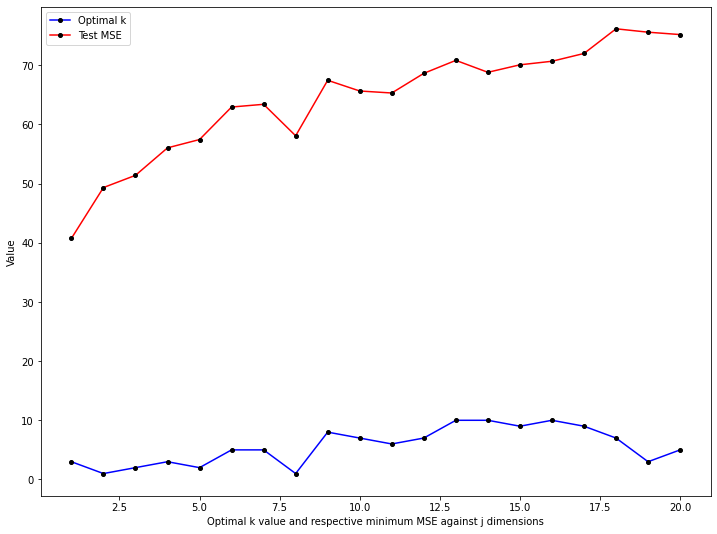

In [22]:
#Plot the optimal MSE against j
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(range(1,21), optimal_k, color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label='Optimal k')
plt.plot(range(1,21), test_mse_value, color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label='Test MSE')
plt.xlabel('Optimal k value and respective minimum MSE against j dimensions')
plt.ylabel('Value')
plt.legend()
plt.show()

**Interpret the result:**
In this model, the plot shows that the minimum test MSE generally increases when there are more dimensions j addded to the KNN model. This could indicate that some features introduced are irrelevant predictors. We can see the impact of such irrelevant predictors to the performance of the model. If there are more predictors, the model is more complex, it may perform well in training data but not in test data, and overfitting could occur. 

A higher optimal k and lower test MSE is considered as a good fit to the data, but the optimal k should not be too high leading to be under-fitting. Whereas, a lower optimal k and higher test MSE indicated the over-fitting effect that the model might not identify its nearest neighbors properly. 

We could see there is variations in optimal k value when we add each dimension into the model after each iteration, but it does not fluctuate much. In case it varies a lot, it may indicate that the model is becoming more complex and could impact prediction.

Furthermore, We should choose the optimal k value that has the lowest test MSE. It could be the situation when j = 6, optimal k = 5 and test MSE = 62.92241337118189. This scenario is much better then the case when j = 20, optimal k = 5 also but test MSE = 75.16169703405784. There are some test MSE which is less than 60. However we should consider these values because its corresponding optimal k is 1 or 3, and such low optimal k value might lead to over-fitting issue for the model. 